In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Cargar la base de datos automáticamente
FILE_PATH = "all_apps_wide-2025-02-14 (2).csv"  # Cambia el nombre si el archivo se actualiza
df = pd.read_csv(FILE_PATH)

In [4]:

# Identificar dinámicamente las columnas de contribuciones por ronda
contribution_cols = [col for col in df.columns if re.match(r"public_goods_simple\.\d+\.player\.contribution", col)]

# Extraer el número de rondas
rounds = sorted([int(re.search(r"\d+", col).group()) for col in contribution_cols])

# Reestructurar el dataframe para análisis
df_contributions = df.melt(
    id_vars=["participant.id_in_session", "survey.1.player.gender", "survey.1.player.age"],
    value_vars=contribution_cols,
    var_name="round",
    value_name="contribution"
)

In [5]:
# Limpiar la columna de rondas para que sea numérica
df_contributions["round"] = df_contributions["round"].str.extract("(\d+)").astype(int)

# Eliminar valores nulos en contribuciones
df_contributions = df_contributions.dropna()

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_21456\3179046398.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_21456\3179046398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


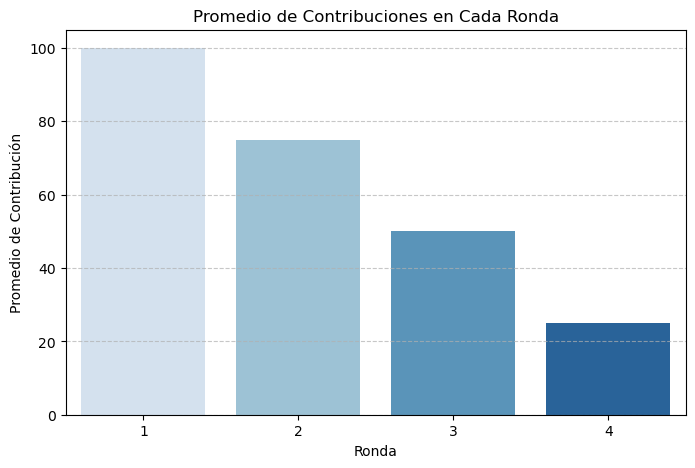

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_contributions,
    x="round",
    y="contribution",
    estimator=sum,  # Calcula el promedio de contribución en cada ronda
    palette="Blues",
    ci=None  # Desactiva intervalos de confianza para mostrar solo promedios
)
plt.xlabel("Ronda")
plt.ylabel("Promedio de Contribución")
plt.title("Promedio de Contribuciones en Cada Ronda")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.savefig("average_contributions_per_round.png")  # Guarda la imagen
plt.show()

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_21456\498889221.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


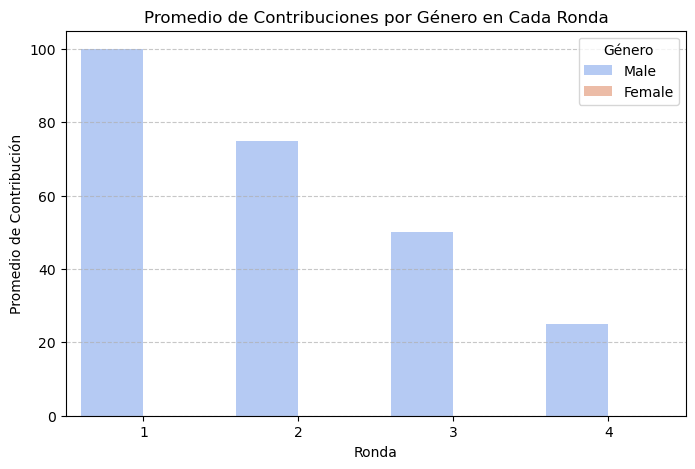

In [6]:
#  **Gráfico de líneas: Contribuciones por ronda**
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_contributions,
    x="round",
    y="contribution",
    hue="survey.1.player.gender",
    palette="coolwarm",
    ci=None  # Desactiva intervalos de confianza para mostrar solo promedios
)
plt.xlabel("Ronda")
plt.ylabel("Promedio de Contribución")
plt.title("Promedio de Contribuciones por Género en Cada Ronda")
plt.legend(title="Género")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.savefig("average_contributions_by_gender.png")  # Guarda la imagen
plt.show()

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_2508\3876800588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="survey.1.player.gender", y="contribution", data=df_contributions, palette="coolwarm")


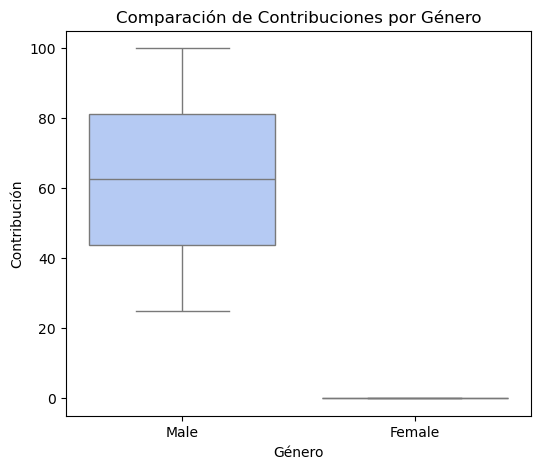

In [10]:
# **Gráfico de comparación por género (Boxplot)**
plt.figure(figsize=(6, 5))
sns.boxplot(x="survey.1.player.gender", y="contribution", data=df_contributions, palette="coolwarm")
plt.xlabel("Género")
plt.ylabel("Contribución")
plt.title("Comparación de Contribuciones por Género")
plt.savefig("gender_plot.png")  # Guarda la imagen
plt.show()

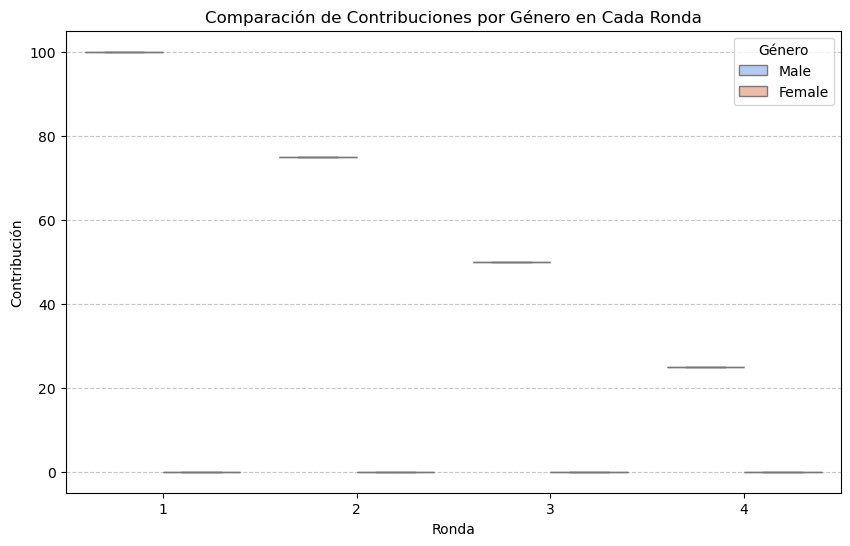

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_contributions,
    x="round",
    y="contribution",
    hue="survey.1.player.gender",
    palette="coolwarm"
)
plt.xlabel("Ronda")
plt.ylabel("Contribución")
plt.title("Comparación de Contribuciones por Género en Cada Ronda")
plt.legend(title="Género")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.savefig("boxplot_contributions_by_gender.png")  # Guarda la imagen
plt.show()